In [7]:
import numpy as np
import matplotlib.pyplot as plt
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import VariableElimination
from IPython.display import Image


## MI 11
## MI BCCN
## Janel, Luisa, Tarek, Myriam

## Exercise 2 

In [8]:
# Defining the model structure. We can define the network by just passing a list of edges.
model = BayesianNetwork([('Cloudy', 'Sprinkler'), ('Cloudy', 'Rain'), ('Rain', 'Wet'), ('Sprinkler', 'Wet')])

cloudy_cpd  =  TabularCPD('Cloudy', variable_card=2, values=[[0.5], [0.5]], state_names={'Cloudy': ['True', 'False']})

sprinkler_cpd  =  TabularCPD('Sprinkler', variable_card=2, values=[[0.1, 0.5], [ 0.9  ,0.5]], evidence =  ['Cloudy'], evidence_card = [2], state_names={'Sprinkler':['On', 'Off'],
    'Cloudy': ['True', 'False']})

rain_cpd  =  TabularCPD('Rain', variable_card=2, values=[[0.8, 0.2], [ 0.2, 0.8]], evidence =  ['Cloudy'], evidence_card = [2], state_names={'Rain':['True', 'False'],
    'Cloudy': ['True', 'False']})

wet_cpd  =  TabularCPD('Wet', variable_card=2, values=[[0.99, 0.9, 0.9, 0], [ 0.01 ,0.1,0.1,1 ]], evidence =  ['Rain','Sprinkler'], evidence_card = [2,2], state_names={'Wet':['True', 'False'],
    'Rain': ['True', 'False'], 'Sprinkler':['On', 'Off']})

model.add_cpds(sprinkler_cpd, rain_cpd,wet_cpd,cloudy_cpd)
model.check_model()

infer = VariableElimination(model)
print('Predictions over the state of the Sprinkler given the information that the grass is wet:')
print(infer.query(['Sprinkler'], evidence={'Wet': 'True'}))

print('Predictions over the state of the Sprinkler given the information that the grass is wet and it rained:')
print(infer.query(['Sprinkler'], evidence={'Wet': 'True', 'Rain': 'True'}))


Predictions over the state of the Sprinkler given the information that the grass is wet:
+----------------+------------------+
| Sprinkler      |   phi(Sprinkler) |
+================+==================+
| Sprinkler(On)  |           0.4298 |
+----------------+------------------+
| Sprinkler(Off) |           0.5702 |
+----------------+------------------+
Predictions over the state of the Sprinkler given the information that the grass is wet and it rained:
+----------------+------------------+
| Sprinkler      |   phi(Sprinkler) |
+================+==================+
| Sprinkler(On)  |           0.1945 |
+----------------+------------------+
| Sprinkler(Off) |           0.8055 |
+----------------+------------------+


## Exercise 3

a. Contruct DAG

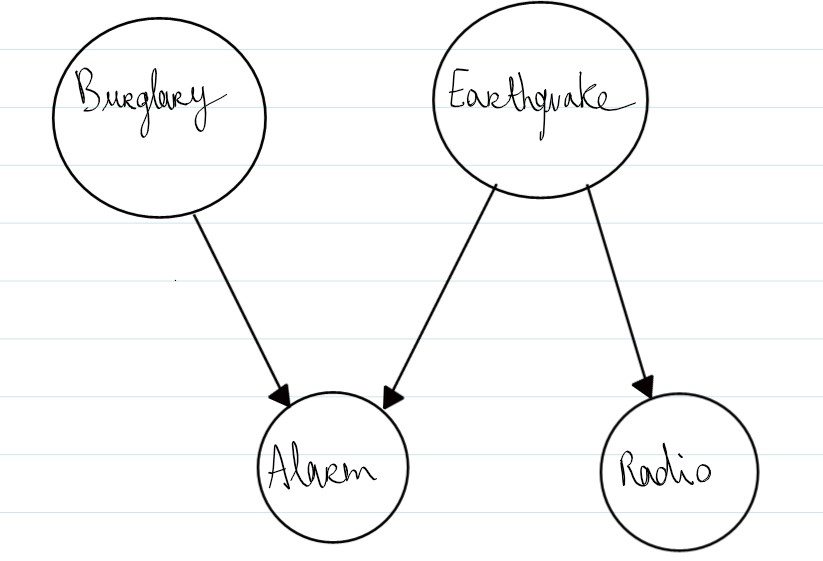

In [9]:
Image('DAG.jpg')

### b

In [13]:
# Defining the model structure. We can define the network by just passing a list of edges.
model = BayesianNetwork([('Burglary', 'Alarm'), ('Earthquake', 'Alarm'), ('Earthquake', 'Radio')])
bulgary_cpd  =  TabularCPD('Burglary', variable_card=2, values=[[0.01], [0.99]], state_names={'Burglary': ['True', 'False']})
earthquake_cpd  =  TabularCPD('Earthquake', variable_card=2, values=[[10**(-6)], [1-10**(-6)]], state_names={'Earthquake': ['True', 'False']})


alarm_cpd  =  TabularCPD('Alarm', variable_card=2, values=[[0.98, 0.41,0.95,0.001], [0.02, 0.59,0.05,0.999]], evidence =  ['Earthquake', 'Burglary'], evidence_card = [2,2], state_names={'Alarm' : ['True', 'False'],'Earthquake':['True', 'False'],
    'Burglary': ['True', 'False']})
radio_cpd  =  TabularCPD('Radio', variable_card=2, values=[[1, 0], [ 0, 1]], evidence =  ['Earthquake'], evidence_card = [2], state_names={'Radio':['True', 'False'],
    'Earthquake': ['True', 'False']}) # I used to have 0.8 and 0.2 



model.add_cpds(bulgary_cpd, earthquake_cpd,alarm_cpd,radio_cpd)
model.check_model()


infer = VariableElimination(model)
print('P(Alarm)\n')
print(infer.query(['Alarm']))

print('\n P(Alarm| Radio = True) \n')
print(infer.query(['Alarm'], evidence={'Radio': 'True'}))

print('\n P(Burglary | Alarm =True) \n')
print(infer.query(['Burglary'], evidence={'Alarm': 'True'}))

print('\n P(Burglary | Alarm =True and Radio = True) \n')
print(infer.query(['Burglary'], evidence={'Alarm': 'True', 'Radio' : 'True'}))

print('\n P(Burglary | RAdio =True) \n')
print(infer.query(['Burglary'], evidence={'Radio': 'True'}))




P(Alarm)

+--------------+--------------+
| Alarm        |   phi(Alarm) |
+==============+==============+
| Alarm(True)  |       0.0105 |
+--------------+--------------+
| Alarm(False) |       0.9895 |
+--------------+--------------+

 P(Alarm| Radio = True) 

+--------------+--------------+
| Alarm        |   phi(Alarm) |
+==============+==============+
| Alarm(True)  |       0.4157 |
+--------------+--------------+
| Alarm(False) |       0.5843 |
+--------------+--------------+

 P(Burglary | Alarm =True) 

+-----------------+-----------------+
| Burglary        |   phi(Burglary) |
+=================+=================+
| Burglary(True)  |          0.9056 |
+-----------------+-----------------+
| Burglary(False) |          0.0944 |
+-----------------+-----------------+

 P(Burglary | Alarm =True and Radio = True) 

+-----------------+-----------------+
| Burglary        |   phi(Burglary) |
+=================+=================+
| Burglary(True)  |          0.0236 |
+-----------------+-

### c

Having the extra information of Radio = True when Alarm = True, changes drastically the probability of Burglary = True, and brings it to a value similar to the probability knowing only that Radio = True, 
because the probability of having both a burglary and an earthquake at the same time is pretty low
